# Student Performance Data Analysis

This notebook visualizes data from the UCI Student Performance dataset.  
We use the `student-mat.csv` file, which contains information on students' performance in a mathematics course, including demographics, academic metrics, and family background.

**Source**: [Student Performance Dataset - UCI Repository](https://archive.ics.uci.edu/ml/datasets/Student+Performance)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

def load_student_data(csv_path):
    """
    Loads the student performance dataset from a CSV file.

    @param csv_path: Path to the CSV file.
    @return: DataFrame containing student data.
    """
    df = pd.read_csv(csv_path, sep=';')
    return df

# Load and preview the dataset
student_data = load_student_data('student-mat.csv')

# Display the first few rows of the dataset
print("Student Dataset Preview:")
print(student_data.head())

Student Dataset Preview:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


## Bar Chart: Students per Grade Group

This bar chart shows how students are distributed across final grade (G3) groupings.  
We categorize grades into ranges (e.g., 0–4, 5–9, etc.) and count how many students fall into each.

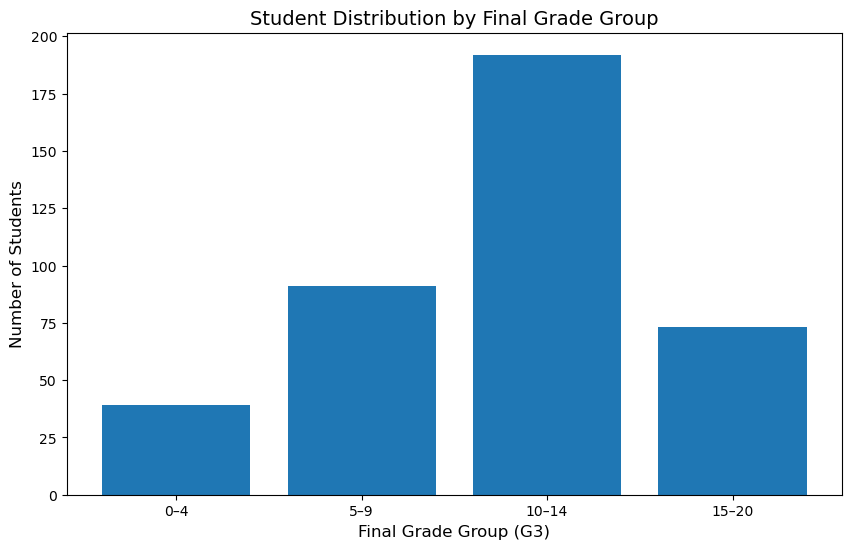

In [3]:
def plot_grade_group_bar_chart(dataframe):
    """
    Creates a bar chart showing the number of students per G3 grade group.

    @param dataframe: DataFrame containing student performance data.
    """
    # Define grade bins
    bins = [0, 4, 9, 14, 20]
    labels = ['0–4', '5–9', '10–14', '15–20']
    dataframe['grade_group'] = pd.cut(dataframe['G3'], bins=bins, labels=labels, include_lowest=True)

    group_counts = dataframe['grade_group'].value_counts().sort_index()

    plt.figure(figsize=(10, 6))
    plt.bar(group_counts.index.astype(str), group_counts.values)

    plt.xlabel("Final Grade Group (G3)", fontsize=12)
    plt.ylabel("Number of Students", fontsize=12)
    plt.title("Student Distribution by Final Grade Group", fontsize=14)

    #plt.savefig("JohnDoe_StudentGradeBarChart.png")
    plt.show()

# Call the function to generate the chart
plot_grade_group_bar_chart(student_data)

## Line Graph: Average Final Grade vs. Study Time

This line graph shows the relationship between the amount of study time and the average final grade (G3).  
It helps us understand how study time may impact academic performance.

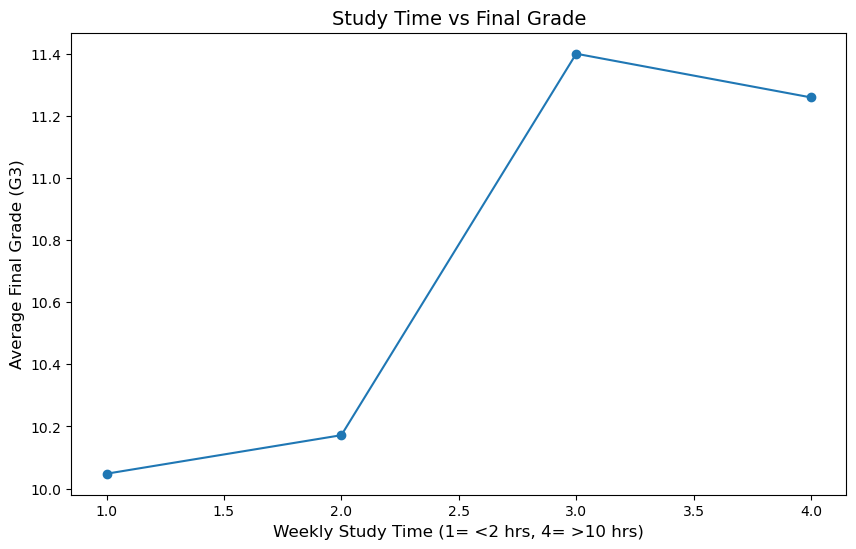

In [5]:
def plot_study_time_vs_grade_line_graph(dataframe):
    """
    Creates a line graph showing average final grade vs. study time.

    @param dataframe: DataFrame containing student performance data.
    """
    grouped_data = dataframe.groupby('studytime')['G3'].mean()

    plt.figure(figsize=(10, 6))
    plt.plot(grouped_data.index, grouped_data.values, marker='o')

    plt.xlabel("Weekly Study Time (1= <2 hrs, 4= >10 hrs)", fontsize=12)
    plt.ylabel("Average Final Grade (G3)", fontsize=12)
    plt.title("Study Time vs Final Grade", fontsize=14)

    #plt.savefig("JohnDoe_StudyTimeLineGraph.png")
    plt.show()

# Call the function
plot_study_time_vs_grade_line_graph(student_data)

## Pie Chart: Parental Education Level Distribution

This pie chart visualizes the distribution of the father’s education levels (`Fedu`).  
It gives us insight into the background diversity of the student group.

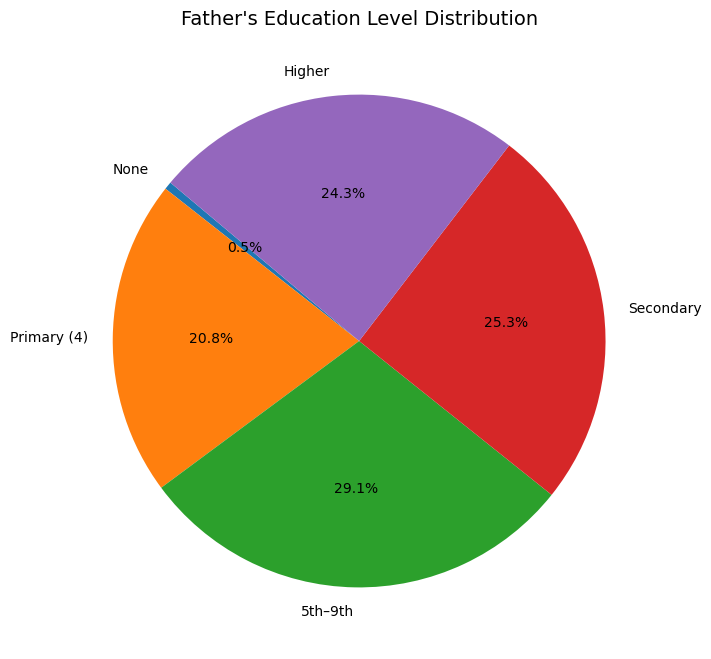

In [7]:
def plot_parental_education_pie_chart(dataframe):
    """
    Creates a pie chart of the distribution of father's education levels.

    @param dataframe: DataFrame containing student performance data.
    """
    edu_counts = dataframe['Fedu'].value_counts().sort_index()
    labels = ['None', 'Primary (4)', '5th–9th', 'Secondary', 'Higher']

    plt.figure(figsize=(8, 8))
    plt.pie(edu_counts, labels=labels[:len(edu_counts)], autopct='%1.1f%%', startangle=140)
    plt.title("Father's Education Level Distribution", fontsize=14)
    #plt.savefig("JohnDoe_ParentalEducationPieChart.png")
    plt.show()

# Call the function
plot_parental_education_pie_chart(student_data)

## Box Plot: Final Grade Distribution (G3)

This box chart displays the spread and outliers in final grades of the students.  
It helps visualize central tendency and variability.

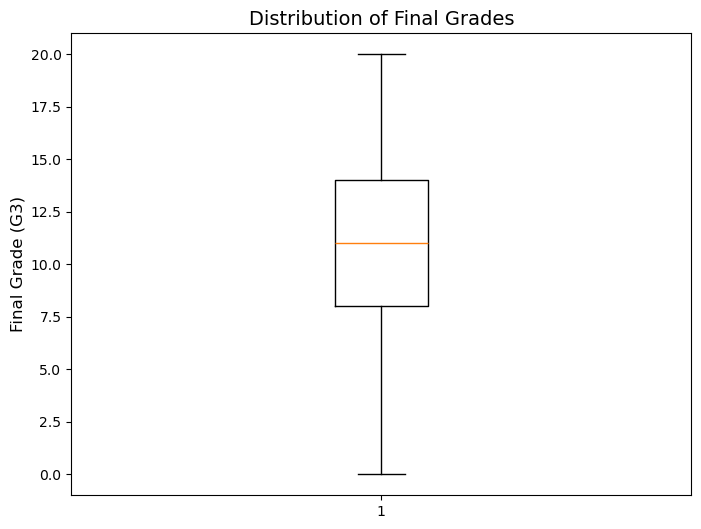

In [9]:
def plot_final_grade_box_chart(dataframe):
    """
    Creates a box plot to show distribution of final grades (G3).

    @param dataframe: DataFrame containing student performance data.
    """
    plt.figure(figsize=(8, 6))
    plt.boxplot(dataframe['G3'])

    plt.ylabel("Final Grade (G3)", fontsize=12)
    plt.title("Distribution of Final Grades", fontsize=14)
    #plt.savefig("JohnDoe_FinalGradeBoxPlot.png")
    plt.show()

# Call the function
plot_final_grade_box_chart(student_data)